#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Huh?
Think of it like Excel for Python that doesn't suck.

In [1]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

#Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [2]:
int_series = pd.Series(range(10))
int_series.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [3]:
num_series = pd.Series(randn(10))
num_series.head()

0    0.466595
1    1.458759
2    0.560270
3    0.335996
4    0.439390
dtype: float64

In [4]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [5]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series.head()

0    <function <lambda> at 0x106c8f2a8>
1    <function <lambda> at 0x106c8f1b8>
2    <function <lambda> at 0x106c8f0c8>
3    <function <lambda> at 0x106c8f320>
4    <function <lambda> at 0x106c8f398>
dtype: object

#Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [6]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.157008
Alabama       0.271401
Indiana      -0.975450
Montana       0.649645
Kentucky     -0.075163
dtype: float64


Washington   -0.828734
Alabama      -0.020662
Montana       0.337287
Indiana       0.684325
New York      1.044453
dtype: float64


In [7]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama       0.250738
California         NaN
Indiana      -0.291125
Kentucky           NaN
Montana       0.986932
New York           NaN
Washington         NaN
dtype: float64

In [8]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

Alabama      -0.203180
California    0.545907
Indiana      -0.493221
Kentucky      0.061571
Montana      -0.169250
dtype: float64

In [9]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31   -1.095279
2015-02-28   -1.705899
2015-03-31   -0.510460
2015-04-30   -0.283797
2015-05-31   -0.679914
2015-06-30   -0.842282
2015-07-31   -0.081378
2015-08-31    1.020374
2015-09-30    0.440991
2015-10-31    1.001638
Freq: M, dtype: float64

In [10]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q')

2015-03-31   -1.103879
2015-06-30   -0.601997
2015-09-30    0.459996
2015-12-31    1.001638
Freq: Q-DEC, dtype: float64

#DataFrames
Data frames extend the concept of Series to table-like data.

In [11]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,-1.143348,2.062954,-0.505914,-0.542069,-1.584379
2015-02-28,0.658830,-0.485753,1.442875,0.546691,1.296615
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490
2015-04-30,-0.735129,2.113196,1.309023,0.027226,-1.835355
2015-05-31,-0.270804,-0.048938,-0.451612,-0.507399,-0.612965
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695
2015-07-31,-1.726897,-0.752957,-0.615605,-0.250319,-1.081979
2015-08-31,-2.195304,-1.345296,-0.656554,-1.382995,-0.252311
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570
2015-10-31,0.376233,-0.208479,2.273469,0.212773,1.380277


In [12]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [13]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [14]:
#The columns all have the same index:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
#What's the index for the rows?
row.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

#DataFrame basics

In [16]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,-1.143348,2.062954,-0.505914,-0.542069,-1.584379,0.919605
2015-02-28,0.658830,-0.485753,1.442875,0.546691,1.296615,0.173077
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490,1.993206
2015-04-30,-0.735129,2.113196,1.309023,0.027226,-1.835355,1.378067
2015-05-31,-0.270804,-0.048938,-0.451612,-0.507399,-0.612965,-0.319743
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695,-0.058672
2015-07-31,-1.726897,-0.752957,-0.615605,-0.250319,-1.081979,-2.479854
2015-08-31,-2.195304,-1.345296,-0.656554,-1.382995,-0.252311,-3.540599
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570,-0.308485
2015-10-31,0.376233,-0.208479,2.273469,0.212773,1.380277,0.167754


In [17]:
#Delete a column
df.drop('new', axis=1)

,a,b,c,d,e
2015-01-31,-1.143348,2.062954,-0.505914,-0.542069,-1.584379
2015-02-28,0.658830,-0.485753,1.442875,0.546691,1.296615
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490
2015-04-30,-0.735129,2.113196,1.309023,0.027226,-1.835355
2015-05-31,-0.270804,-0.048938,-0.451612,-0.507399,-0.612965
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695
2015-07-31,-1.726897,-0.752957,-0.615605,-0.250319,-1.081979
2015-08-31,-2.195304,-1.345296,-0.656554,-1.382995,-0.252311
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570
2015-10-31,0.376233,-0.208479,2.273469,0.212773,1.380277


##Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [18]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

,a,b,c,d,e,new
2015-01-31,-1.143348,2.062954,-0.505914,-0.542069,-1.584379,0.919605
2015-02-28,0.658830,-0.485753,1.442875,0.546691,1.296615,0.173077
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490,1.993206
2015-05-31,-0.270804,-0.048938,-0.451612,-0.507399,-0.612965,-0.319743
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695,-0.058672
2015-07-31,-1.726897,-0.752957,-0.615605,-0.250319,-1.081979,-2.479854
2015-08-31,-2.195304,-1.345296,-0.656554,-1.382995,-0.252311,-3.540599
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570,-0.308485
2015-10-31,0.376233,-0.208479,2.273469,0.212773,1.380277,0.167754


#Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [19]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

,a,b,c,d,e,new
2015-02-28,0.658830,-0.485753,1.442875,0.546691,1.296615,0.173077
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490,1.993206
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695,-0.058672
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570,-0.308485
2015-10-31,0.376233,-0.208479,2.273469,0.212773,1.380277,0.167754


In [20]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new
2015-03-31,0.652732,1.340474,-0.894651,-0.541520,0.547490,1.993206
2015-06-30,0.010572,-0.069243,-0.253239,-0.323348,-1.077695,-0.058672
2015-09-30,0.585070,-0.893555,-0.849016,-0.291847,-0.323570,-0.308485


In [ ]:
#Selecting a column
df.a
#Works sometimes.

In [ ]:
df['a'] #works always

In [21]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,-1.143348,2.062954
2015-02-28,0.658830,-0.485753
2015-03-31,0.652732,1.340474
2015-04-30,-0.735129,2.113196
2015-05-31,-0.270804,-0.048938
2015-06-30,0.010572,-0.069243
2015-07-31,-1.726897,-0.752957
2015-08-31,-2.195304,-1.345296
2015-09-30,0.585070,-0.893555
2015-10-31,0.376233,-0.208479


#Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [22]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,-0.451612,-0.507399,-0.612965
2015-06-30,-0.253239,-0.323348,-1.077695
2015-07-31,-0.615605,-0.250319,-1.081979
2015-08-31,-0.656554,-1.382995,-0.252311


In [23]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,-0.894651,-0.541520,0.547490
2015-04-30,1.309023,0.027226,-1.835355
2015-05-31,-0.451612,-0.507399,-0.612965
2015-06-30,-0.253239,-0.323348,-1.077695
2015-07-31,-0.615605,-0.250319,-1.081979


In [24]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new


In [25]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [26]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,1.280106,-0.466317,1.732939,1.081218,0.154248,Alabama
2015-02-28,0.371117,-0.685107,0.918546,-0.263773,-0.590534,Alaska
2015-03-31,0.035069,0.781747,1.813453,0.721023,0.082303,Arizona
2015-04-30,2.238615,-1.368774,-1.028821,2.387643,1.387509,Alabama
2015-05-31,0.676634,1.683604,-0.332364,-0.264154,0.378226,Alaska


In [28]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,1.280106,-0.466317,1.732939,1.081218,0.154248
Alaska,2015-02-28,0.371117,-0.685107,0.918546,-0.263773,-0.590534
Arizona,2015-03-31,0.035069,0.781747,1.813453,0.721023,0.082303
Alabama,2015-04-30,2.238615,-1.368774,-1.028821,2.387643,1.387509
Alaska,2015-05-31,0.676634,1.683604,-0.332364,-0.264154,0.378226


('Alabama', Timestamp('2015-01-31 00:00:00'))

In [31]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,1.280106,-0.466317,1.732939,1.081218,0.154248
2015-04-30,2.238615,-1.368774,-1.028821,2.387643,1.387509
2015-07-31,-0.402826,1.332836,0.734681,-1.922603,-2.260875
2015-10-31,-0.950359,0.118545,0.866325,-0.105059,0.243204
2016-01-31,0.187560,0.142747,-1.085881,0.918004,0.356604


In [32]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [33]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0    1.280106
1   -0.466317
2    1.732939
3    1.081218
4    0.154248
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [34]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

/Users/scott/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


0                             1                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31  1.280106       NaN       NaN -0.466317       NaN       NaN   
2015-02-28       NaN  0.371117       NaN       NaN -0.685107       NaN   
2015-03-31       NaN       NaN  0.035069       NaN       NaN  0.781747   
2015-04-30  2.238615       NaN       NaN -1.368774       NaN       NaN   
2015-05-31       NaN  0.676634       NaN       NaN  1.683604       NaN   

                   2                             3                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31  1.732939       NaN       NaN  1.081218       NaN       NaN   
2015-02-28       NaN  0.918546       NaN       NaN -0.263773       NaN   
2015-03-31       NaN       NaN  1.813453       NaN       NaN  0.721023   
2015-04-30 -1.028821       NaN       NaN  2.387643       NaN       NaN   
2015-05-31       NaN -0.332364       NaN       NaN -0.264154       NaN   

                   4                      
state        Alabama    Alaska   Arizona  
index                                     
2015-01-31  0.154248       NaN       NaN  
2015-02-28       NaN -0.590534       NaN  
2015-03-31       NaN       NaN  0.082303  
2015-04-30  1.387509       NaN       NaN  
2015-05-31       NaN  0.378226       NaN

In [ ]:
df.head()

#split-apply-combine

In [35]:
df.groupby(level=1).mean().head()

,0,1,2,3,4
index,,,,,
2015-01-31,1.280106,-0.466317,1.732939,1.081218,0.154248
2015-02-28,0.371117,-0.685107,0.918546,-0.263773,-0.590534
2015-03-31,0.035069,0.781747,1.813453,0.721023,0.082303
2015-04-30,2.238615,-1.368774,-1.028821,2.387643,1.387509
2015-05-31,0.676634,1.683604,-0.332364,-0.264154,0.378226


In [36]:
df.groupby(level=0).mean().head() #Groupby index

,0,1,2,3,4
state,,,,,
Alabama,0.173062,-0.049322,0.030444,-0.024764,0.101674
Alaska,-0.118404,0.433872,0.164598,-0.137009,-0.138930
Arizona,-0.441754,0.118957,0.239654,0.104140,-0.130351


In [37]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,0.173062,-0.049322,0.030444,-0.024764,0.101674
Alaska,-0.118404,0.433872,0.164598,-0.137009,-0.138930
Arizona,-0.441754,0.118957,0.239654,0.104140,-0.130351


In [38]:
df

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,1.280106,-0.466317,1.732939,1.081218,0.154248
Alaska,2015-02-28,0.371117,-0.685107,0.918546,-0.263773,-0.590534
Arizona,2015-03-31,0.035069,0.781747,1.813453,0.721023,0.082303
Alabama,2015-04-30,2.238615,-1.368774,-1.028821,2.387643,1.387509
Alaska,2015-05-31,0.676634,1.683604,-0.332364,-0.264154,0.378226
Arizona,2015-06-30,0.795351,0.297730,1.697800,-0.802927,-0.185184
Alabama,2015-07-31,-0.402826,1.332836,0.734681,-1.922603,-2.260875
Alaska,2015-08-31,-0.934453,0.615194,1.220205,1.081601,1.398518
Arizona,2015-09-30,-0.088721,-1.446514,1.043860,1.311307,0.138018


In [39]:
#Apply
g = df.groupby(level=0)

In [40]:
#If one row for each index.
g.aggregate(np.mean)

,0,1,2,3,4
state,,,,,
Alabama,0.173062,-0.049322,0.030444,-0.024764,0.101674
Alaska,-0.118404,0.433872,0.164598,-0.137009,-0.138930
Arizona,-0.441754,0.118957,0.239654,0.104140,-0.130351


In [41]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,0.994669,-0.575522,1.608540,0.890882,0.043350
Alaska,2015-02-28,0.718110,-1.400090,1.144534,-0.164450,-0.432632
Arizona,2015-03-31,0.506373,0.490678,1.438868,0.849020,0.474147
Alabama,2015-04-30,1.855881,-1.821059,-1.000808,1.943224,1.060240
Alaska,2015-05-31,1.166292,1.563691,-0.754415,-0.164945,0.495432


In [42]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

0          1          2          3          4
state                                                               
Alabama count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean    0.173062  -0.049322   0.030444  -0.024764   0.101674
        std     1.112977   0.724552   1.058410   1.241446   1.212776
        min    -1.145234  -1.368774  -1.145703  -1.922603  -2.260875
        25%    -0.813476  -0.442962  -1.023636  -0.733560  -0.127752
        50%    -0.005338   0.061202   0.179187  -0.070638   0.198726
        75%     0.851070   0.139841   0.833414   0.704635   0.633431
        max     2.238615   1.332836   1.732939   2.387643   1.955026
Alaska  count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.118404   0.433872   0.164598  -0.137009  -0.138930
        std     0.681680   0.799219   0.658738   0.770836   1.043849
        min    -1.059717  -0.685107  -0.658728  -1.372683  -1.459123

In [51]:
mylist = range(10)
map(lambda x: x**2, mylist)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [53]:
mylist = np.arange(10)
mylist**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [50]:
mywords = ['i', 'went', 'to']
map(lambda x: x, mywords)

['i', 'went', 'to']

In [55]:
df['4'].map(lambda x:x)

KeyError: '4'

#Reading and writing data.


In [56]:
df.to_csv('saved_data.csv', delimiter='\t')

In [57]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

In [58]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

'Other methods:\npd.read_excel\npd.read_sql\npd.read_stata\n...\n'

#Other very useful things.

join, concat and merge

In [ ]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

In [59]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

,0,1,2,3,4
state,,,,,
Alabama,0.173062,-0.049322,0.030444,-0.024764,0.101674
Alaska,-0.118404,0.433872,0.164598,-0.137009,-0.138930
Arizona,-0.441754,0.118957,0.239654,0.104140,-0.130351


In [60]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

NameError: name 'state_df' is not defined

In [61]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

NameError: name 'state_df' is not defined

#Exploratory Data Analysis with Pandas

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [5]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.4285714
std,6.571667,9.840486,0.5135526
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107480990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10755b9d0>]], dtype=object)

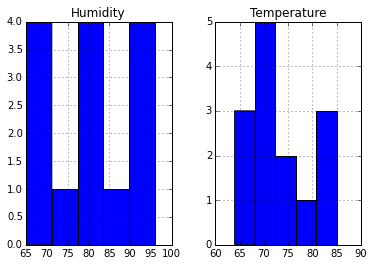

In [6]:
df.hist(['Temperature','Humidity'],bins=5)

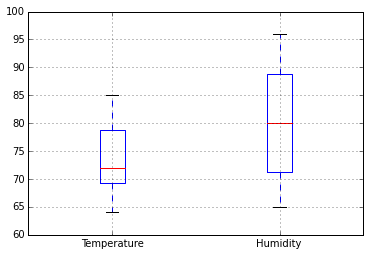

In [7]:
df[['Temperature','Humidity']].plot(kind='box')

###Scatterplots for examining bivariate relationships

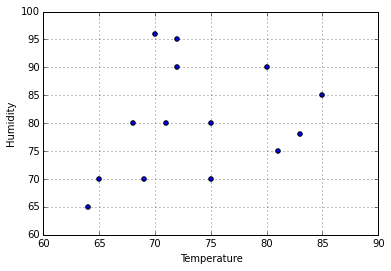

In [8]:
df.plot('Temperature', 'Humidity', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [9]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


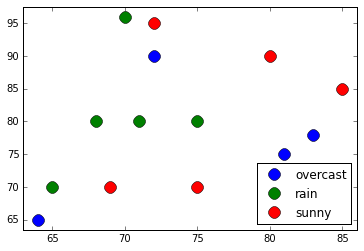

In [10]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [11]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
dtype: int64

###Using apply will get you the value counts for multiple columns at once

In [12]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5
Play,NaN,9
overcast,4,NaN
rain,5,NaN
sunny,5,NaN


###Contingency Tables for looking at bivariate relationships between two categorical variables

In [13]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


###Often we want the row percentages

In [14]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


###Or the column percentages

In [15]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


#Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI

In [71]:
pd.read_csv('data/hospital-costs.csv')

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2011,324,Adirondack Medical Center-Saranac Lake Site,4,4,Tracheostomy W MV 96+ Hours W Extensive Proced...,Extreme,P,Surgical,3,361289,210882,196080,123347
1,2011,324,Adirondack Medical Center-Saranac Lake Site,5,4,Tracheostomy W MV 96+ Hours W/O Extensive Proc...,Extreme,P,Surgical,1,102190,102190,59641,59641
2,2011,324,Adirondack Medical Center-Saranac Lake Site,24,2,Extracranial Vascular Procedures,Moderate,P,Surgical,6,14172,13506,6888,6445
3,2011,324,Adirondack Medical Center-Saranac Lake Site,26,1,Other Nervous System & Related Procedures,Minor,P,Surgical,1,8833,8833,4259,4259
4,2011,324,Adirondack Medical Center-Saranac Lake Site,41,1,Nervous System Malignancy,Minor,M,Medical,1,5264,5264,1727,1727
5,2011,324,Adirondack Medical Center-Saranac Lake Site,41,2,Nervous System Malignancy,Moderate,M,Medical,1,17314,17314,5826,5826
6,2011,324,Adirondack Medical Center-Saranac Lake Site,42,2,Degenerative Nervous System Disorders Exc Mult...,Moderate,M,Medical,4,11574,11190,6122,5729
7,2011,324,Adirondack Medical Center-Saranac Lake Site,42,3,Degenerative Nervous System Disorders Exc Mult...,Major,M,Medical,2,18195,18195,9919,9919
8,2011,324,Adirondack Medical Center-Saranac Lake Site,42,4,Degenerative Nervous System Disorders Exc Mult...,Extreme,M,Medical,1,18243,18243,9694,9694
9,2011,324,Adirondack Medical Center-Saranac Lake Site,43,1,Multiple Sclerosis & Other Demyelinating Diseases,Minor,M,Medical,1,28313,28313,10598,10598


In [66]:
cd pandas_numpy_matplotlib/

/Users/scott/Documents/python4ds/pandas_numpy_matplotlib


In [68]:
cd data

/Users/scott/Documents/python4ds/pandas_numpy_matplotlib/data


In [69]:
ls


apples.csv            baseball-csvs/        hospital-costs.csv    one.csv               playgolf.csv          readme-game-logs.txt  readme2013.txt*       two.csv


In [70]:
cd ..

/Users/scott/Documents/python4ds/pandas_numpy_matplotlib
